In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nAlqeJjvSII4ZvIDxedv")
project = rf.workspace("rin-glqpe").project("dog-breed-ibs17")
version = project.version(1)
dataset = version.download("yolov8")




/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dog-breed-1 in yolov8:: 100%|██████████| 2812/2812 [00:00<00:00, 4123.89it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data='/content/datasets/dog-breed-1/data.yaml' epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 61.6MB/s]
New https://pypi.org/project/ultralytics/8.3.40 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/dog-breed-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content


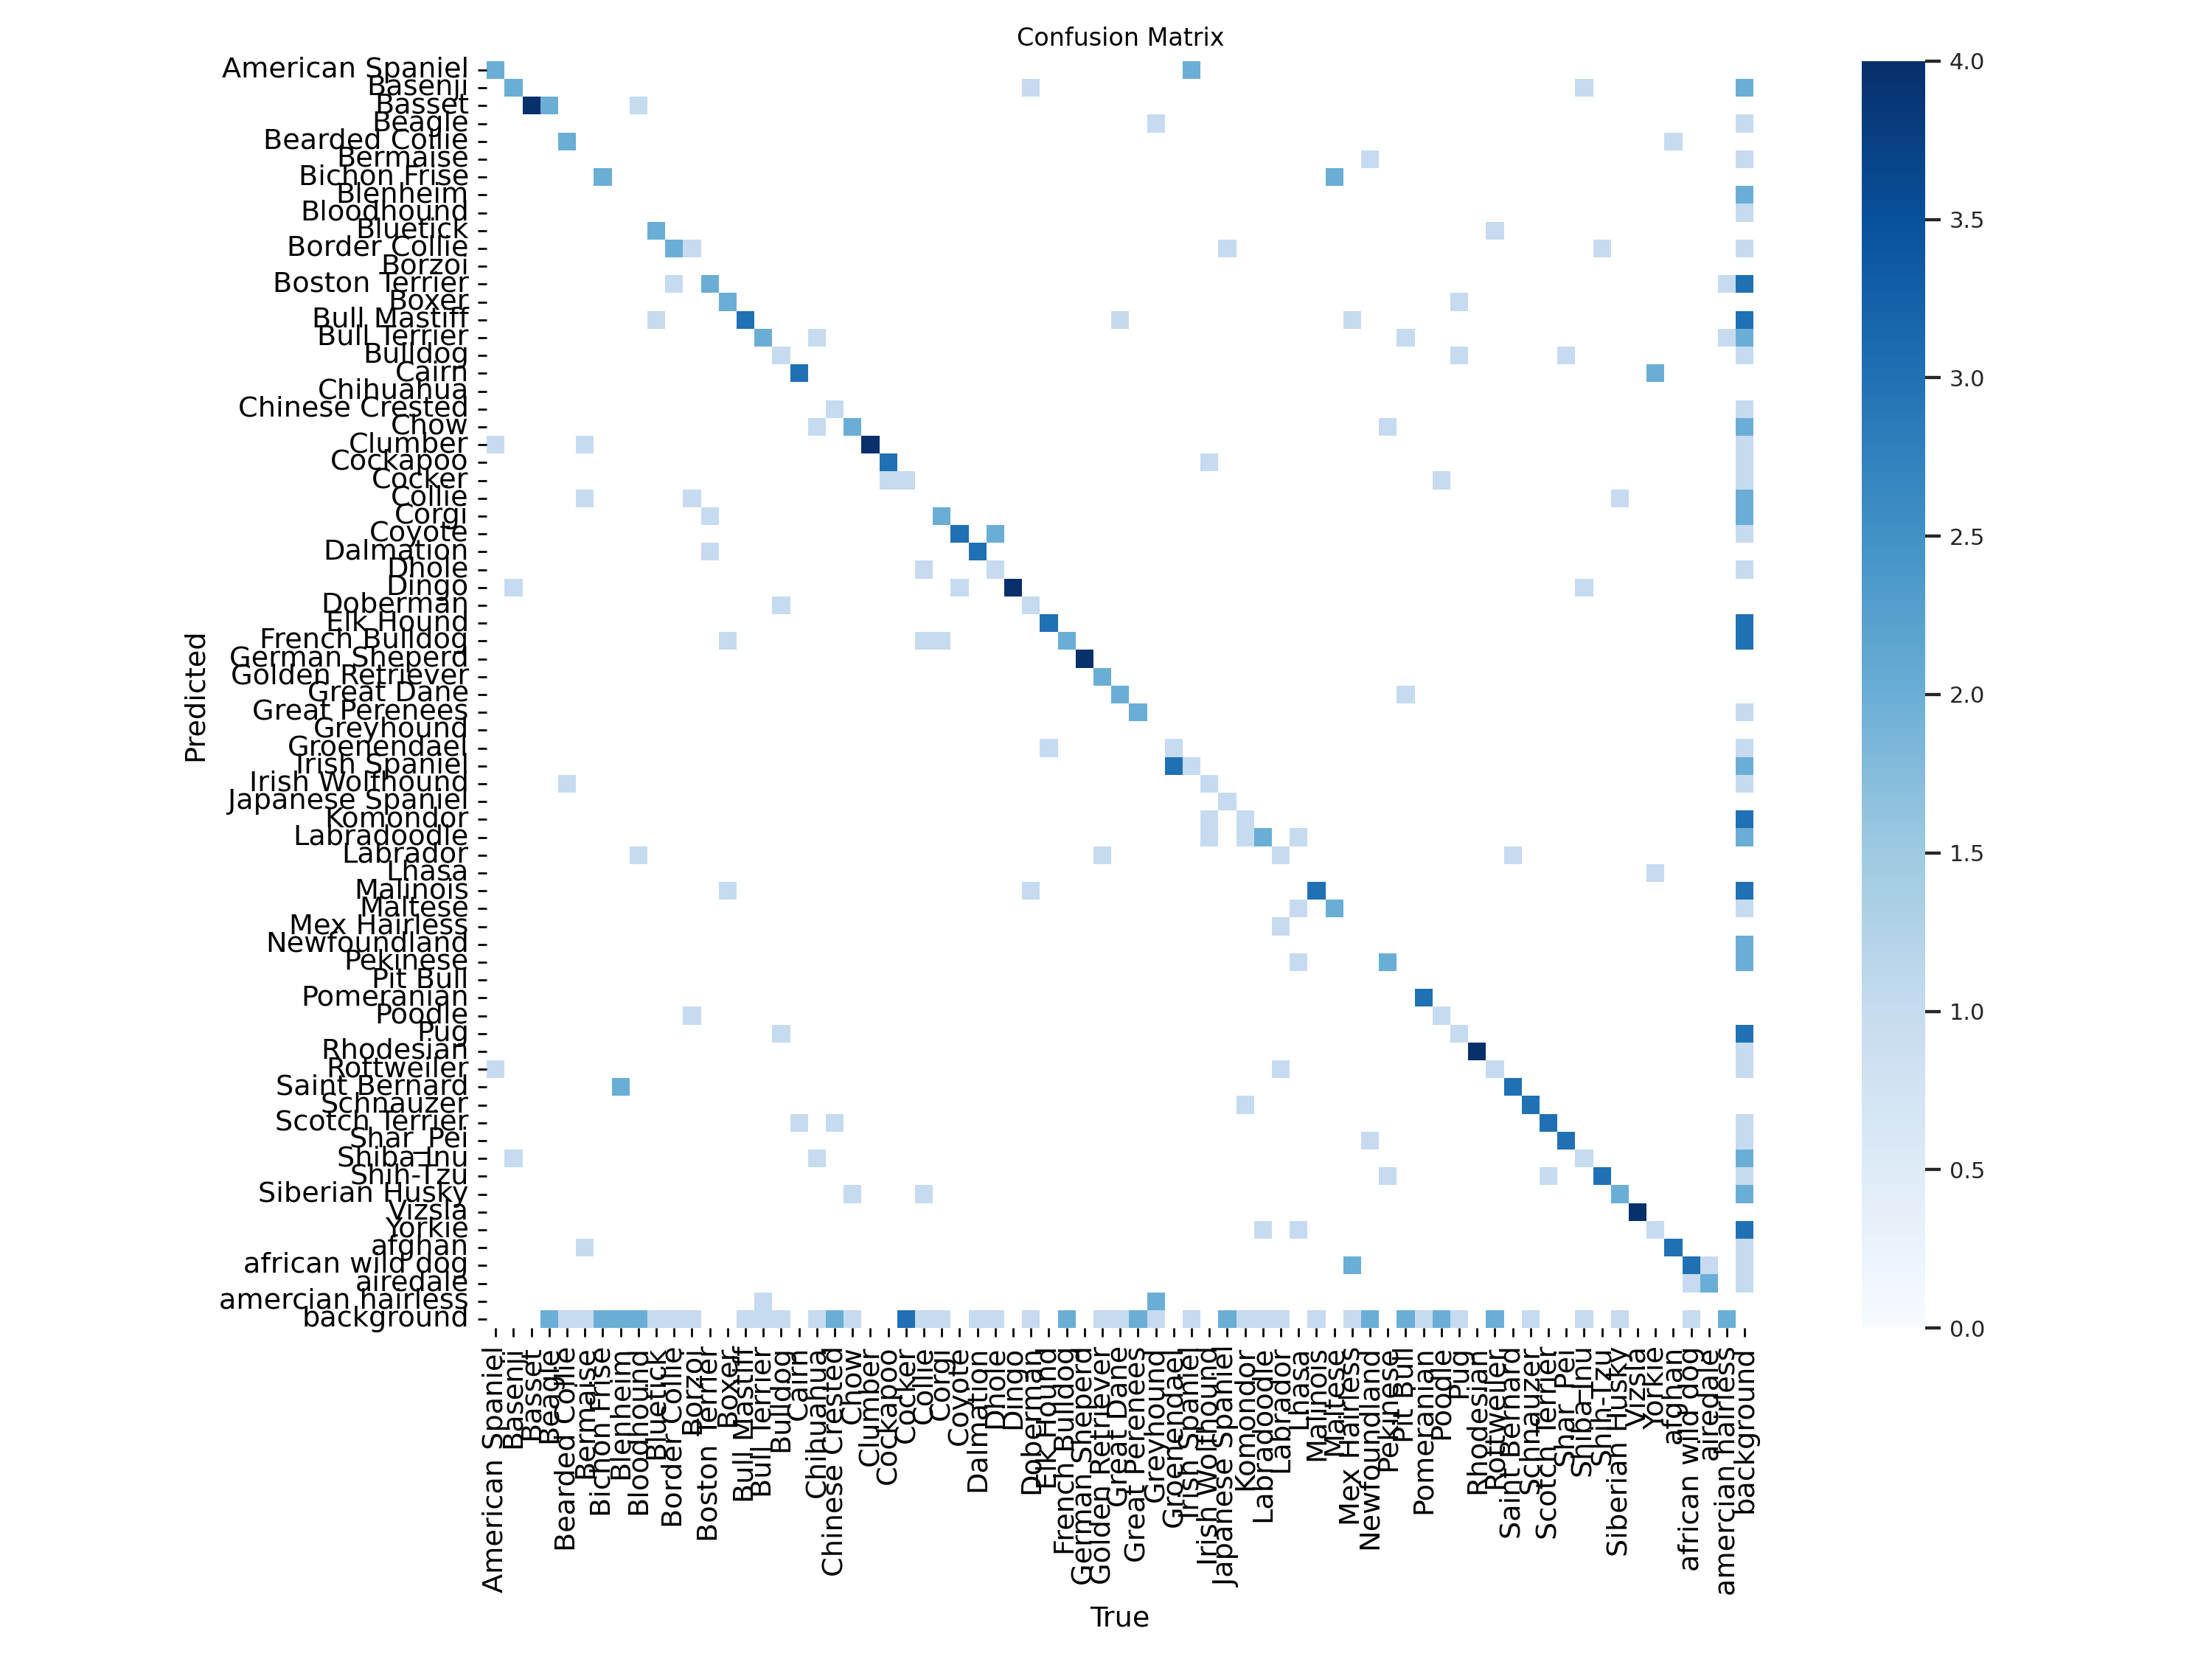

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


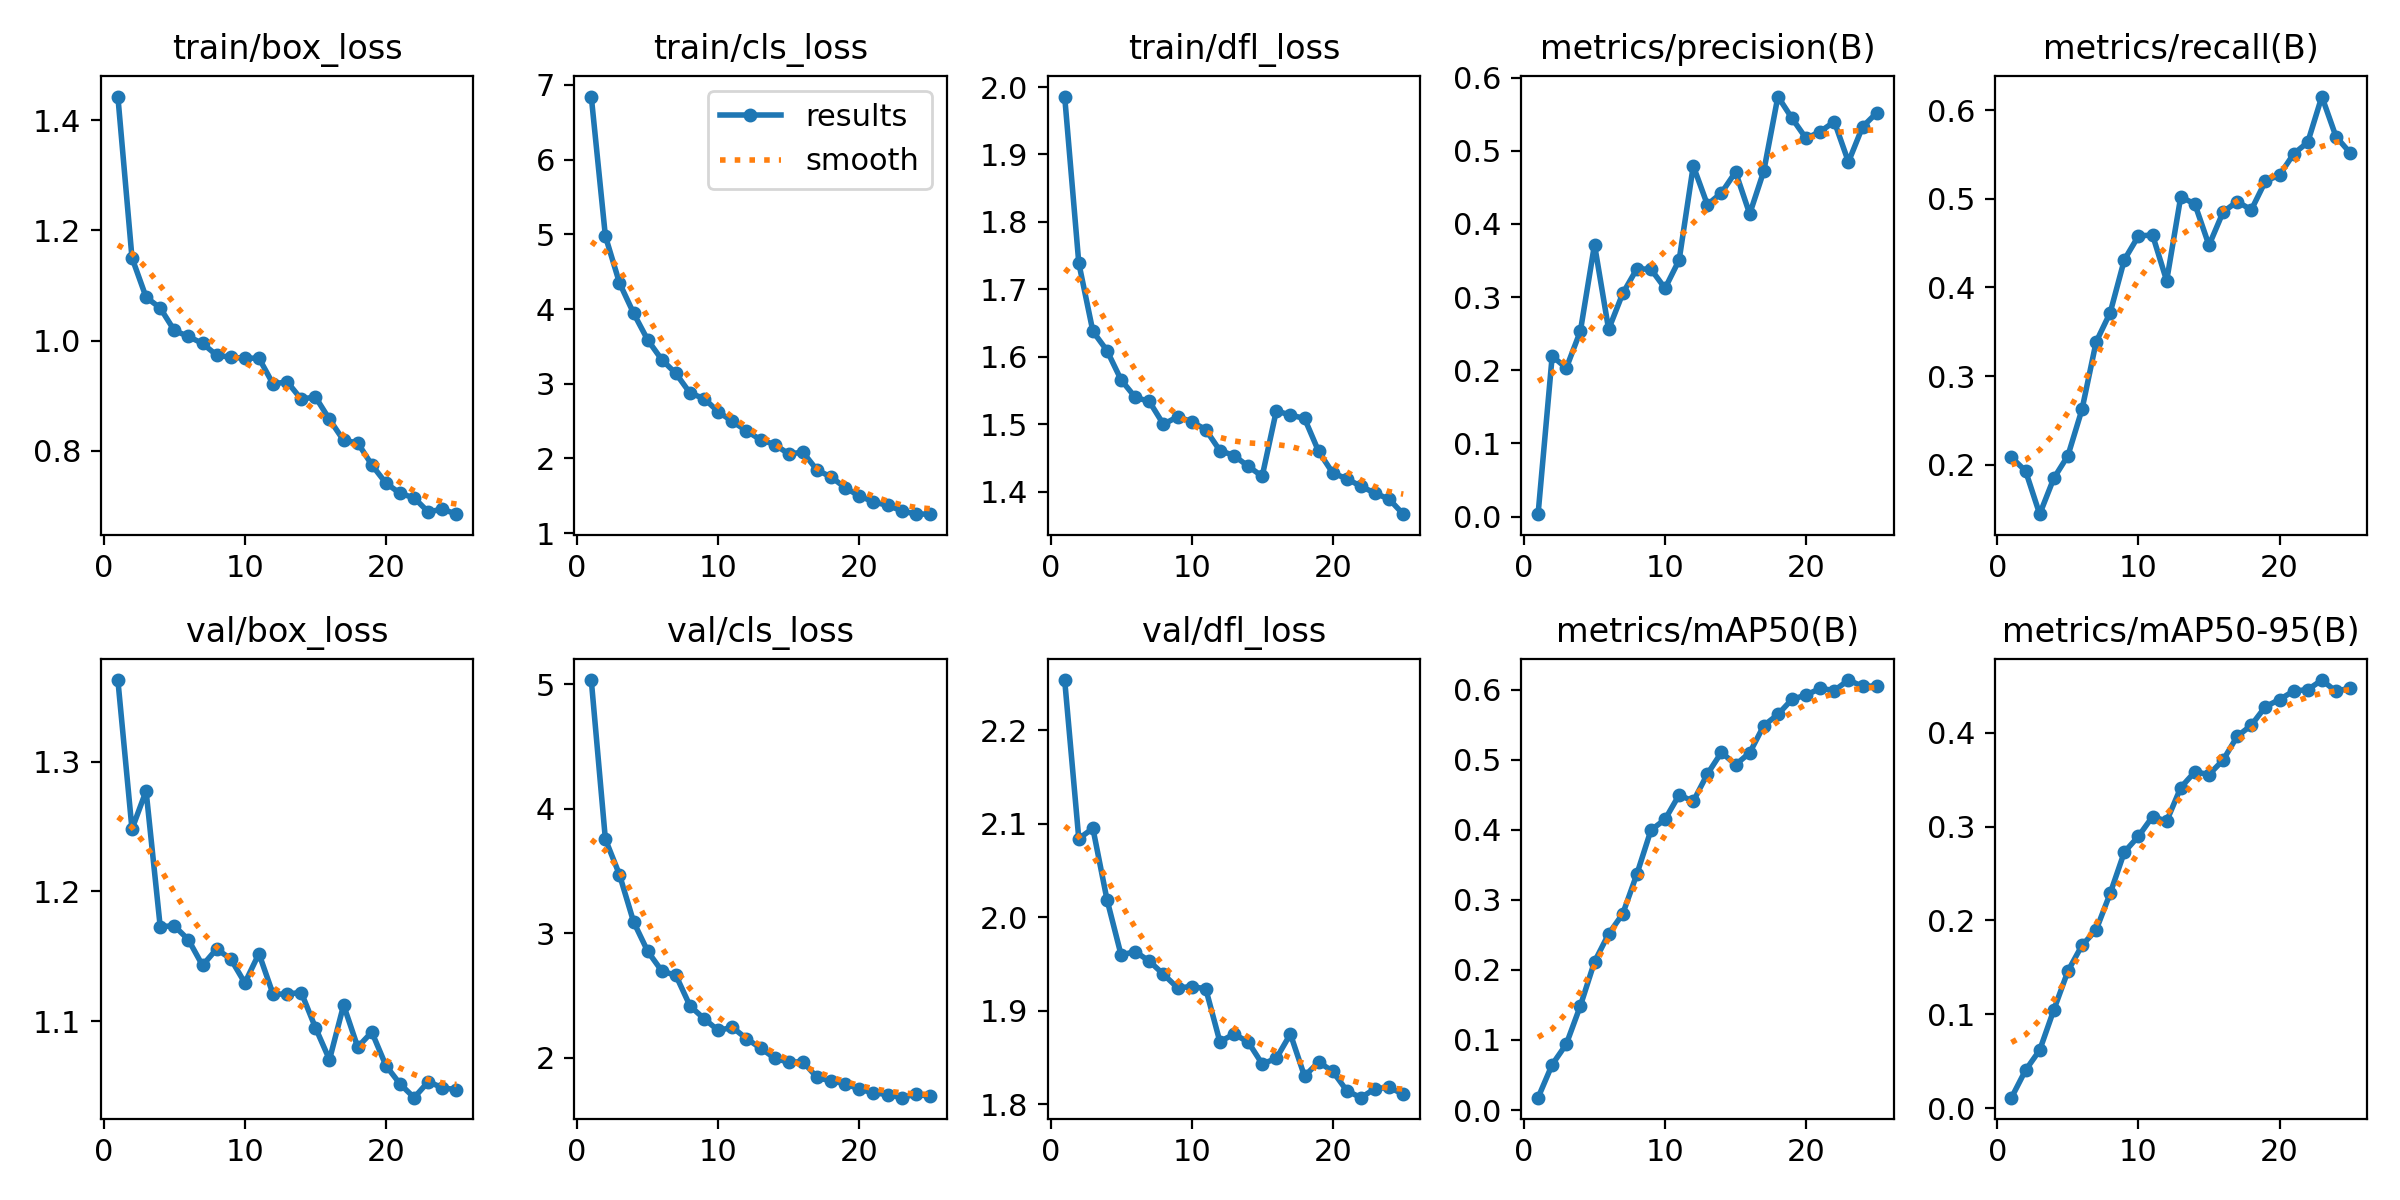

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
my_new_model = YOLO('/content/drive/MyDrive/Dog_breedclassificationmodel/best.pt')
new_image = '/content/datasets/dog-breed-1/train/images/001_jpg.rf.897a384a0502c6c2b61c7e3957c453e0.jpg'
new_results = my_new_model.predict(new_image, conf=0.2)  #Adjust conf threshold


image 1/1 /content/datasets/dog-breed-1/train/images/001_jpg.rf.897a384a0502c6c2b61c7e3957c453e0.jpg: 800x800 1 Maltese, 1 Shih-Tzu, 23.1ms
Speed: 6.8ms preprocess, 23.1ms inference, 677.4ms postprocess per image at shape (1, 3, 800, 800)


In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

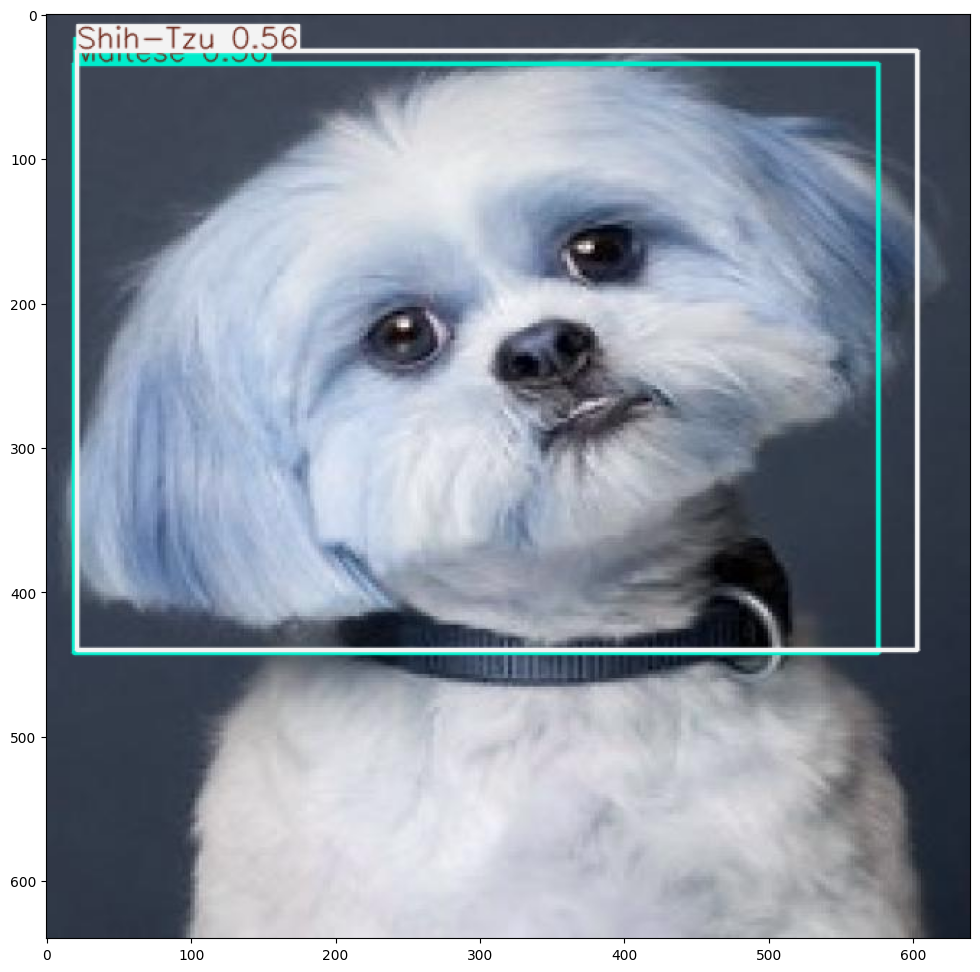

In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)